In [1]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [34]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [35]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [36]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [37]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [6]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [7]:
response = requests.get(spacex_url)

In [17]:
# print(response.content)

In [9]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [10]:
response=requests.get(static_json_url)

In [11]:
response.status_code

200

In [13]:
data = response.json()
df = pd.json_normalize(data)

In [38]:
data = df
data.head()

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

In [39]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [21]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [22]:
BoosterVersion

[]

In [40]:
# Call getBoosterVersion
getBoosterVersion(data)

In [41]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [42]:
# Call getLaunchSite
getLaunchSite(data)

In [43]:
# Call getPayloadData
getPayloadData(data)

In [44]:
# Call getCoreData
getCoreData(data)

In [45]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [46]:
import pandas as pd 
data = pd.DataFrame(launch_dict)

# Print the DataFrame to verify
print(data)


    FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0              1  2006-03-24       Falcon 1         20.0   LEO   
1              2  2007-03-21       Falcon 1          NaN   LEO   
2              4  2008-09-28       Falcon 1        165.0   LEO   
3              5  2009-07-13       Falcon 1        200.0   LEO   
4              6  2010-06-04       Falcon 9          NaN   LEO   
..           ...         ...            ...          ...   ...   
89           102  2020-09-03       Falcon 9      15600.0  VLEO   
90           103  2020-10-06       Falcon 9      15600.0  VLEO   
91           104  2020-10-18       Falcon 9      15600.0  VLEO   
92           105  2020-10-24       Falcon 9      15600.0  VLEO   
93           106  2020-11-05       Falcon 9       3681.0   MEO   

         LaunchSite    Outcome  Flights  GridFins  Reused   Legs  \
0   Kwajalein Atoll  None None        1     False   False  False   
1   Kwajalein Atoll  None None        1     False   False  False   
2  

In [47]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [48]:
data_falcon9 = data[data['BoosterVersion'] == 'Falcon 9']


In [49]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [50]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [52]:
payload_mass_mean = data['PayloadMass'].mean()

# Replace the missing values with the mean
data['PayloadMass'] = data['PayloadMass'].replace(np.nan, payload_mass_mean)

In [53]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [54]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    


In [55]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [56]:
response = requests.get(static_url)

# Print the response status code to check if the request was successful
print(response.status_code)

200


In [57]:
html_content = response.text

# Create a BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

print("BeautifulSoup object created successfully.")

BeautifulSoup object created successfully.


In [59]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [60]:
html_tables = soup.find_all('table')

print("Found", len(html_tables), "HTML tables.")


Found 25 HTML tables.


In [61]:
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [62]:
def extract_column_from_header(header):
    if header.a:
        name = header.a.string
    else:
        name = header.string

    if not name:
        name = header.get_text()

    if "name" not in str(name).lower():
        name = name.strip()
    return name

# Your provided list initialization
column_names = []

# Use the find_all() function with `th` element on the first_launch_table
header_elements = first_launch_table.find_all('th')

# Iterate each th element and apply the provided extract_column_from_header()
for th_element in header_elements:
    name = extract_column_from_header(th_element)
    
    # Append the Non-empty column name into a list
    if name is not None and len(name) > 0:
        column_names.append(name)

print(column_names)


['Flight No.', 'UTC', 'Version,Booster [b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '1', '2', '3', '4', '5', '6', '7']


In [65]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
# del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [66]:
print(launch_dict.keys())

# A more robust way to remove the key, in case of extra whitespace
for key in list(launch_dict.keys()):
    if 'Date and time' in key:
        del launch_dict[key]
        print(f"Removed key: {key}")
        break # Exit the loop after finding and removing the k

dict_keys(['Flight No.', 'UTC', 'Version,Booster [b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '1', '2', '3', '4', '5', '6', '7', 'Payload', 'Launch outcome', 'Version Booster', 'Booster landing', 'Date', 'Time'])


In [69]:
extracted_row = 0
# Extract each table
for table_number, table in enumerate(soup.find_all('table', "wikitable plainrowheaders collapsible")):
    # get table row
    for rows in table.find_all("tr"):
        # check to see if first table heading is a number corresponding to a launch number
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False
        # get table element
        row = rows.find_all('td')
        # if it is a number save cells in a dictionary
        if flag:
            extracted_row += 1
            # Flight Number value
            launch_dict['Flight No.'].append(flight_number)
            
            # datatimelist comes from a helper function not shown in the snippet
            datatimelist = date_time(row[0])
            
            # Date value
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            
            # Time value
            time = datatimelist[1]
            launch_dict['Time'].append(time)
              
            # Booster version
            bv = booster_version(row[1])
            # Correcting the typo from 'bdov' to 'bv'
            if not (bv):
                bv = row[1].a.string
            launch_dict['Version Booster'].append(bv)
            
            # Launch Site
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)
            
            # Payload
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
            
            # Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
            
            # Orbit
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
            
            customer_element = row[6].a
            if customer_element:
                customer = customer_element.string
            else:
                customer = row[6].get_text()
            launch_dict['Customer'].append(customer)
            
            # Launch outcome
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
            
            # Booster landing
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)

In [70]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

In [72]:
df

,Flight No.,UTC,"Version,Booster [b]",Launch site,Payload[c],Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding,1,2,3,4,5,6,7,Payload,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,NaN,NaN,CCAFS,NaN,0,LEO,SpaceX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dragon Spacecraft Qualification Unit,Success\n,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,NaN,NaN,CCAFS,NaN,0,LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dragon,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,NaN,NaN,CCAFS,NaN,525 kg,LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dragon,Success,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44
3,4,NaN,NaN,CCAFS,NaN,"4,700 kg",LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpaceX CRS-1,Success\n,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,NaN,NaN,CCAFS,NaN,"4,877 kg",LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpaceX CRS-2,Success\n,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,117,NaN,NaN,CCSFS,NaN,"15,600 kg",LEO,SpaceX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Starlink,Success\n,F9 B5B1051.10657,Success,9 May 2021,06:42
329,118,NaN,NaN,KSC,NaN,"~14,000 kg",LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Starlink,Success\n,F9 B5B1058.8660,Success,15 May 2021,22:56
330,119,NaN,NaN,CCSFS,NaN,"15,600 kg",LEO,Sirius XM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Starlink,Success\n,F9 B5B1063.2665,Success,26 May 2021,18:59
331,120,NaN,NaN,KSC,NaN,"3,328 kg",LEO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpaceX CRS-22,NaN,F9 B5B1067.1668,NaN,3 June 2021,17:29


In [73]:
df.to_csv('spacex_web_scraped.csv', index=False)

In [75]:
import numpy as np

In [76]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [77]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [78]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [79]:
df['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [80]:
df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64

In [82]:
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [83]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [84]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [86]:
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

In [88]:
# landing_class

In [89]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [90]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [91]:
df["Class"].mean()

np.float64(0.6666666666666666)

In [92]:
df.to_csv("dataset_part_2.csv", index=False)

In [94]:
# !pip install ipython-sql
# !pip install ipython-sql prettytable

In [95]:
%load_ext sql

In [96]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [97]:
%sql sqlite:///my_data1.db

In [112]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")
df.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [113]:
%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [114]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [118]:
%sql SELECT * FROM SPACEXTABLE LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [119]:
%sql SELECT DISTINCT Launch_Site FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [120]:
%sql SELECT * FROM SPACEXTABLE WHERE Launch_Site LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [121]:
%sql SELECT SUM(Payload_Mass__kg_) FROM SPACEXTABLE WHERE Customer = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


SUM(Payload_Mass__kg_)
45596


In [122]:
%sql SELECT AVG(Payload_Mass__kg_) FROM SPACEXTABLE WHERE Booster_Version = 'F9 v1.1';

 * sqlite:///my_data1.db
Done.


AVG(Payload_Mass__kg_)
2928.4


In [123]:
%sql SELECT MIN(Date) FROM SPACEXTABLE WHERE Landing_Outcome = 'True RTLS';

 * sqlite:///my_data1.db
Done.


MIN(Date)
None


In [124]:
%sql SELECT Booster_Version FROM SPACEXTABLE WHERE Landing_Outcome = 'True ASDS' AND Payload_Mass__kg_ BETWEEN 4000 AND 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version


In [125]:
%sql SELECT Mission_Outcome, COUNT(*) AS Total FROM SPACEXTABLE GROUP BY Mission_Outcome;

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


In [128]:
%sql SELECT Booster_Version FROM SPACEXTABLE WHERE Payload_Mass__kg_=( SELECT MAX(Payload_Mass__kg_) FROM SPACEXTABLE );

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [132]:
sql_query = """
SELECT
    CASE substr(Date, 6, 2)
        WHEN '01' THEN 'January'
        WHEN '02' THEN 'February'
        WHEN '03' THEN 'March'
        WHEN '04' THEN 'April'
        WHEN '05' THEN 'May'
        WHEN '06' THEN 'June'
        WHEN '07' THEN 'July'
        WHEN '08' THEN 'August'
        WHEN '09' THEN 'September'
        WHEN '10' THEN 'October'
        WHEN '11' THEN 'November'
        WHEN '12' THEN 'December'
    END AS Month,
    Landing_Outcome,
    Booster_Version,
    Launch_Site
FROM SPACEXTABLE
WHERE substr(Date, 0, 5) = '2015' AND Landing_Outcome = 'False ASDS';
"""

# 3. Execute the query
cur.execute(sql_query)

# 4. Fetch the results
records = cur.fetchall()

# 5. Print the results
print(records)
for record in records:
    print(record)

[]


In [133]:
%sql SELECT * FROM SPACEXTABLE WHERE substr(Date, 0, 5) = '2015';

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2015-01-10,9:47:00,F9 v1.1 B1012,CCAFS LC-40,SpaceX CRS-5,2395,LEO (ISS),NASA (CRS),Success,Failure (drone ship)
2015-02-11,23:03:00,F9 v1.1 B1013,CCAFS LC-40,DSCOVR,570,HEO,U.S. Air Force NASA NOAA,Success,Controlled (ocean)
2015-03-02,3:50:00,F9 v1.1 B1014,CCAFS LC-40,ABS-3A Eutelsat 115 West B,4159,GTO,ABS Eutelsat,Success,No attempt
2015-04-14,20:10:00,F9 v1.1 B1015,CCAFS LC-40,SpaceX CRS-6,1898,LEO (ISS),NASA (CRS),Success,Failure (drone ship)
2015-04-27,23:03:00,F9 v1.1 B1016,CCAFS LC-40,Turkmen 52 / MonacoSAT,4707,GTO,Turkmenistan National Space Agency,Success,No attempt
2015-06-28,14:21:00,F9 v1.1 B1018,CCAFS LC-40,SpaceX CRS-7,1952,LEO (ISS),NASA (CRS),Failure (in flight),Precluded (drone ship)
2015-12-22,1:29:00,F9 FT B1019,CCAFS LC-40,OG2 Mission 2 11 Orbcomm-OG2 satellites,2034,LEO,Orbcomm,Success,Success (ground pad)


In [134]:
%sql SELECT CASE substr(Date, 6, 2) WHEN '01' THEN 'January' WHEN '02' THEN 'February' WHEN '03' THEN 'March' WHEN '04' THEN 'April' WHEN '05' THEN 'May'WHEN '06' THEN 'June' WHEN '07' THEN 'July' WHEN '08' THEN 'August' WHEN '09' THEN 'September' WHEN '10' THEN 'October' WHEN '11' THEN 'November' WHEN '12' THEN 'December' END AS Month, Landing_Outcome, Booster_Version, Launch_Site FROM SPACEXTABLE WHERE substr(Date, 0, 5) = '2015' AND Landing_Outcome = 'False ASDS';

 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site


In [135]:
%sql  SELECT Landing_Outcome, COUNT(*) AS Total FROM SPACEXTABLE WHERE Date BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY Landing_Outcome ORDER BY Total DESC;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Total
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


In [136]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [138]:
import requests
# import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the content from the URL
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Read the content into a Pandas DataFrame
    dataset_part_2_csv = io.BytesIO(response.content)
    df = pd.read_csv(dataset_part_2_csv)
    
    # Display the first 5 rows
    print(df.head(5))
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

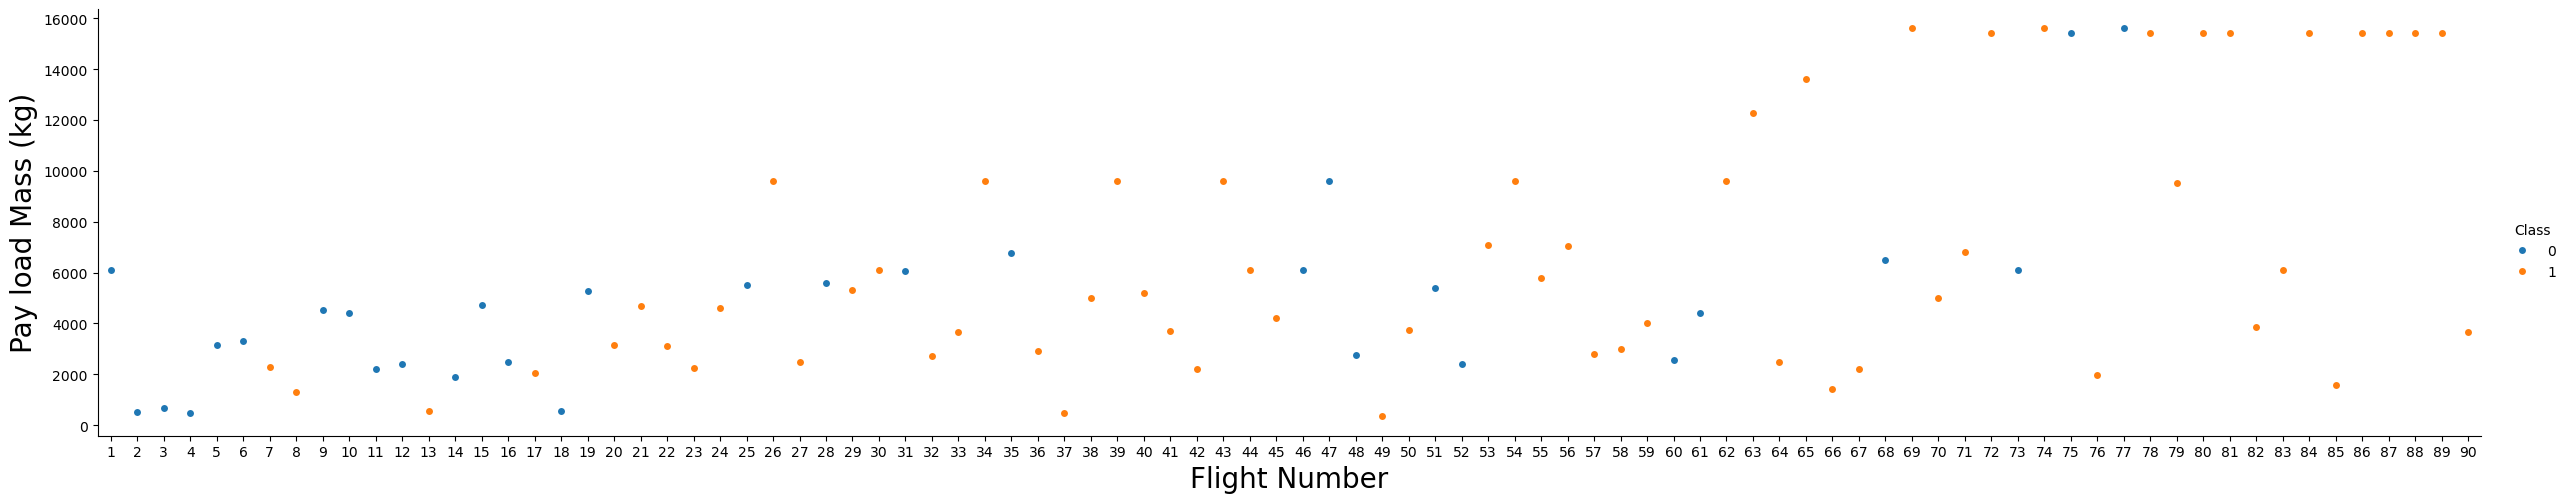

In [139]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

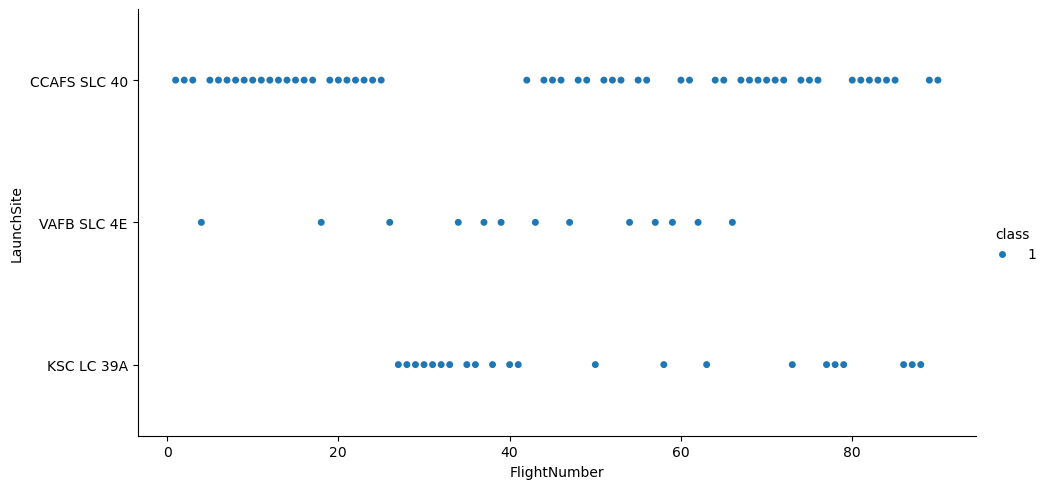

In [141]:
# Assuming your outcome column is named 'Outcome' or similar
bad_outcomes = {'Failure (drone ship)', 'Failure'}

# Create the 'class' column
df['class'] = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

# Now, the plotting code will work correctly
sns.catplot(x="FlightNumber", y="LaunchSite", hue="class", data=df, aspect=2, kind='swarm')

plt.show()

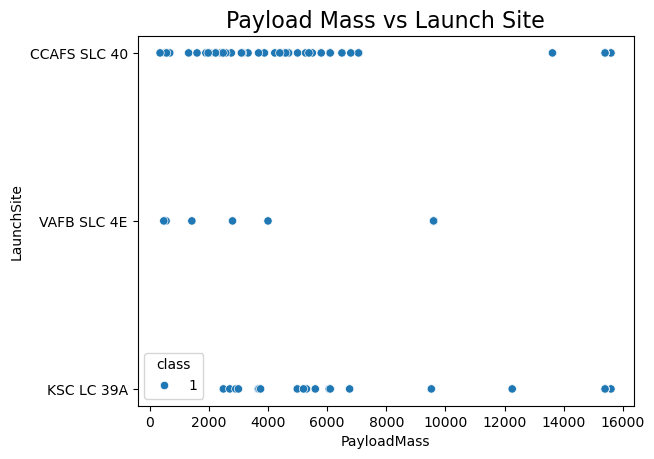

<Figure size 640x480 with 0 Axes>

In [142]:
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="class", data=df)

# Add a title to the plot
plt.title('Payload Mass vs Launch Site', fontsize=16)

# Display the plot
plt.show()

# Save the plot to a file
plt.savefig('payload_mass_vs_launch_site.png')

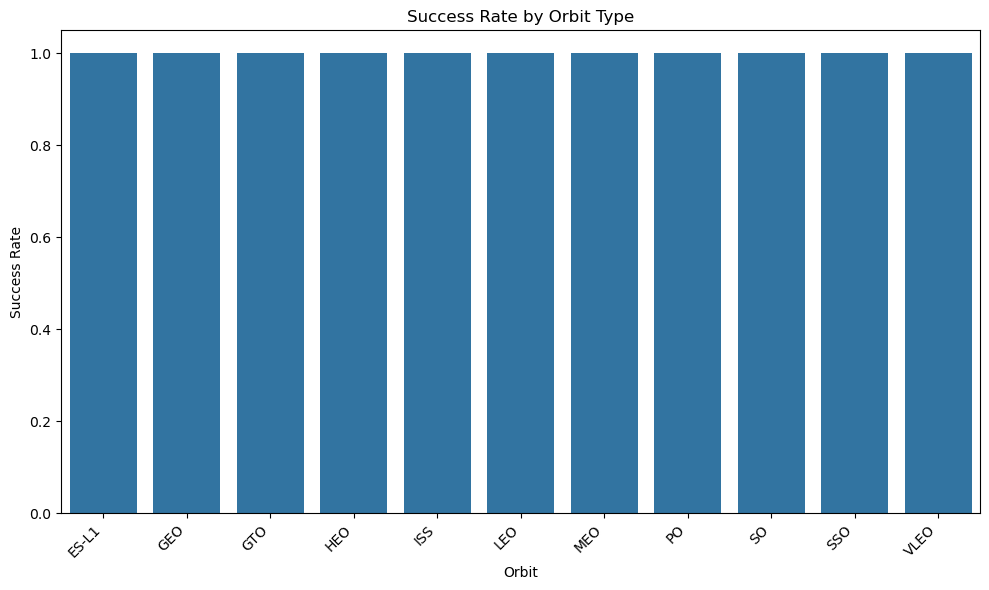

In [143]:
success_rate = df.groupby('Orbit')['class'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='class', data=success_rate)

# Add a title and labels
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

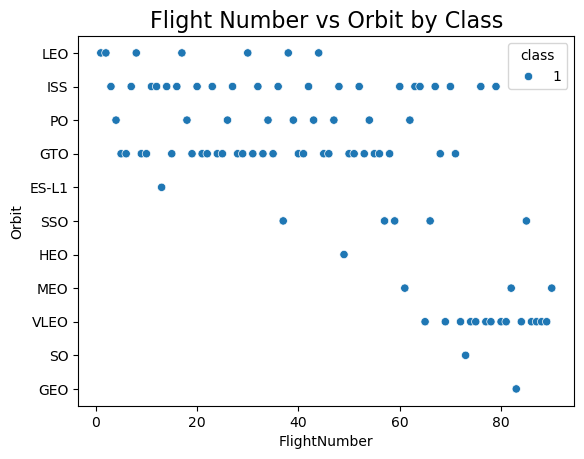

In [144]:
sns.scatterplot(x="FlightNumber", y="Orbit", hue="class", data=df)

# Add a title to the plot
plt.title('Flight Number vs Orbit by Class', fontsize=16)

# Save the plot to a file
plt.savefig('flight_number_vs_orbit.png')

# Display the plot
plt.show()

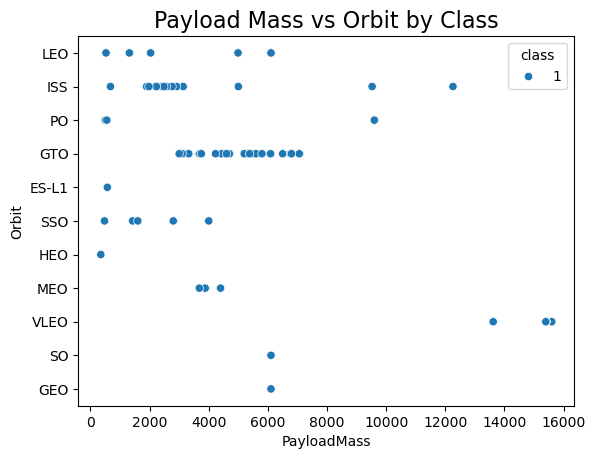

In [145]:
sns.scatterplot(x="PayloadMass", y="Orbit", hue="class", data=df)

# Add a title to the plot
plt.title('Payload Mass vs Orbit by Class', fontsize=16)

# Save the plot to a file
plt.savefig('payload_mass_vs_orbit.png')

# Display the plot
plt.show()

In [146]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,1
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,1
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,1
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,1
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,1


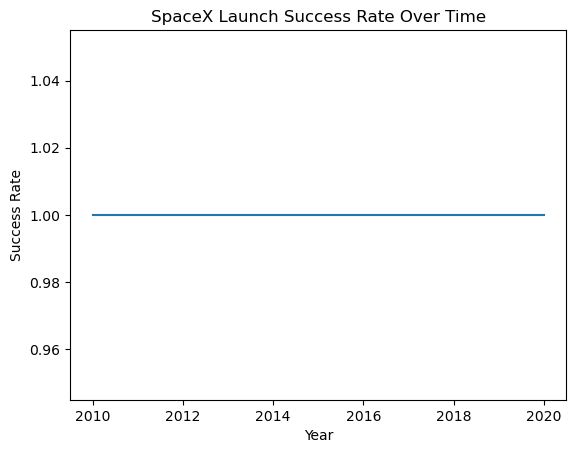

In [147]:
df['year'] = pd.to_datetime(df['Date']).dt.year

# Calculate the success rate by year
success_rate_by_year = df.groupby('year')['class'].mean().reset_index()

# Create the line chart
sns.lineplot(x='year', y='class', data=success_rate_by_year)

# Add a title and labels
plt.title('SpaceX Launch Success Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Success Rate')

# Save the plot to a file
plt.savefig('success_rate_by_year.png')

# Display the plot
plt.show()

In [148]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [149]:
# Use get_dummies() on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the results
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0            0        False      False      False      False      False   
1            0        False      False      False      False      False   
2            0        False      False      False      False       True   
3            0        False      False      False      False      False   
4            0        False      False       True      False      False   

   Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
0       True      False     False     Fa

In [150]:
# Cast the entire DataFrame to variable type float64
features_one_hot = features_one_hot.astype('float64')

# Display the data types to verify the change
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


In [151]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [152]:
import folium
import pandas as pd

In [153]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon


In [154]:

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'

# Fetch the content from the URL
response = requests.get(URL)

# Read the content into a Pandas DataFrame
spacex_csv_file = io.BytesIO(response.content)
spacex_df = pd.read_csv(spacex_csv_file)

# Display the first 5 rows to verify
print(spacex_df.head())

   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                                          Payload  \
0                            Dragon Spacecraft Qualification Unit   
1  Dragon demo flight C1, two CubeSats,  barrel of Brouère cheese   
2                                          Dragon demo flight C2+   
3                                                    SpaceX CRS-1   
4                                                    SpaceX CRS-2   

   Payload Mass (kg)      Orbit         Customer        Landing Outcome  \
0                0.0        LEO           SpaceX  Failure   (parachute)   
1 

In [155]:
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [156]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [157]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [160]:
launch_sites = spacex_df.groupby(['Launch Site'])[['Lat', 'Long']].mean().reset_index()

site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

for index, row in launch_sites.iterrows():
    folium.Circle(
        location=[row['Lat'], row['Long']],
        radius=1000,
        color='#d35400',
        fill=True,
        fill_color='#d35400',
        fill_opacity=0.6,
        popup=row['Launch Site']
    ).add_to(site_map)

# Save the map to an HTML file
site_map.save("launch_sites_map.html")
print("Map saved to launch_sites_map.html")

Map saved to launch_sites_map.html


In [161]:
marker_cluster = MarkerCluster().add_to(site_map)

# Iterate through the DataFrame to add markers for each launch
for index, record in spacex_df.iterrows():
    # Set the color based on the 'class' value
    if record['class'] == 1:
        marker_color = 'green'
        tooltip_text = "Success"
    else:
        marker_color = 'red'
        tooltip_text = "Failure"
    
    # Create and add a marker to the MarkerCluster
    folium.Marker(
        location=[record['Lat'], record['Long']],
        tooltip=tooltip_text,
        icon=folium.Icon(color=marker_color)
    ).add_to(marker_cluster)

# You can save the map to an HTML file to view it
site_map.save("success_failed_launches_map.html")
print("Map generated and saved to success_failed_launches_map.html")

Map generated and saved to success_failed_launches_map.html


In [162]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [163]:
marker_cluster = MarkerCluster()


In [164]:
def get_marker_color(class_value):
    if class_value == 1:
        return 'green'
    else:
        return 'red'

# Apply the function to the 'class' column and create a new 'marker_color' column
spacex_df['marker_color'] = spacex_df['class'].apply(get_marker_color)

In [167]:
for index, record in spacex_df.iterrows():
    # Use the 'class' value to create the tooltip string
    outcome = 'Success' if record['class'] == 1 else 'Failure'
    
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        icon=folium.Icon(color='white', icon_color=record['marker_color'], icon='rocket', prefix='fa'),
        tooltip=f"{record['Launch Site']} - {outcome}"
    )
    marker_cluster.add_child(marker)

In [166]:
print(spacex_df.columns)

Index(['Launch Site', 'Lat', 'Long', 'class', 'marker_color'], dtype='object')


In [173]:
import folium
from geopy.distance import geodesic

# Filter the DataFrame to get the VAFB SLC 4E launch site coordinates
vafb_df = df[df['LaunchSite'] == 'VAFB SLC 4E']
launch_site_coords = (vafb_df.iloc[0]['Latitude'], vafb_df.iloc[0]['Longitude'])

# Coordinates for other proximity points
city_coords = (34.9427, -120.4578) # Lompoc, CA
coastline_coords = (34.6366, -120.6240) # Nearest point on the coastline
highway_coords = (34.6738, -120.5794) # Highway 1

# Calculate distances
dist_to_city = geodesic(launch_site_coords, city_coords).km
dist_to_coastline = geodesic(launch_site_coords, coastline_coords).km
dist_to_highway = geodesic(launch_site_coords, highway_coords).km

# Create a map centered on the launch site
distance_map = folium.Map(location=launch_site_coords, zoom_start=12)

# Add markers for each location
folium.Marker(launch_site_coords, popup="VAFB SLC-4E", icon=folium.Icon(color='blue')).add_to(distance_map)
folium.Marker(city_coords, popup=f"City: Lompoc ({dist_to_city:.2f} km)", icon=folium.Icon(color='green')).add_to(distance_map)
folium.Marker(coastline_coords, popup=f"Coastline ({dist_to_coastline:.2f} km)", icon=folium.Icon(color='red')).add_to(distance_map)
folium.Marker(highway_coords, popup=f"Highway ({dist_to_highway:.2f} km)", icon=folium.Icon(color='orange')).add_to(distance_map)

# Draw lines to show distances
folium.PolyLine(
    locations=[launch_site_coords, city_coords],
    color='green', weight=3, opacity=0.7,
    tooltip=f"Distance to Lompoc: {dist_to_city:.2f} km"
).add_to(distance_map)

folium.PolyLine(
    locations=[launch_site_coords, coastline_coords],
    color='red', weight=3, opacity=0.7,
    tooltip=f"Distance to Coastline: {dist_to_coastline:.2f} km"
).add_to(distance_map)

folium.PolyLine(
    locations=[launch_site_coords, highway_coords],
    color='orange', weight=3, opacity=0.7,
    tooltip=f"Distance to Highway: {dist_to_highway:.2f} km"
).add_to(distance_map)

distance_map.save("spacex_distances_map_from_df.html")
print("Map generated and saved to spacex_distances_map_from_df.html")

Map generated and saved to spacex_distances_map_from_df.html


In [172]:
df.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'class', 'year'],
      dtype='object')

In [169]:
pip install geopy


   -------------------- ------------------- 1/2 [geopy]
   ---------------------------------------- 2/2 [geopy]

Note: you may need to restart the kernel to use updated packages.


In [174]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [175]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [176]:
from geopy.distance import geodesic

# Coordinates for CCAFS SLC 40 launch site
launch_site_coords = (28.56708, -80.56831)

# Coordinates for a nearby coastline point
coastline_coords = (28.56367, -80.57163)

# Calculate the distance in kilometers
distance_coastline = geodesic(launch_site_coords, coastline_coords).km

print(f"The distance to the closest coastline is: {distance_coastline:.2f} km")

The distance to the closest coastline is: 0.50 km


In [177]:
import folium
from folium.plugins import MarkerCluster
from folium.features import DivIcon

# Assuming these variables are already defined from previous steps
# launch_site_coords = (28.56708, -80.56831)
# coastline_coords = (28.56367, -80.57163)
# distance_coastline = 1.11

# The initial map can be a new one centered on the launch site
distance_map = folium.Map(location=launch_site_coords, zoom_start=15)

# Add the launch site marker
folium.Marker(
    location=launch_site_coords,
    icon=folium.Icon(color='blue', icon='rocket', prefix='fa'),
    tooltip="Launch Site"
).add_to(distance_map)

# Add the coastline marker
distance_marker = folium.Marker(
    location=coastline_coords,
    icon=DivIcon(
        icon_size=(200, 20),
        icon_anchor=(0, 0),
        html='<div style="font-size: 12pt; color:#d35400;"><b>%s</b></div>' % f"{distance_coastline:.2f} KM"
    )
).add_to(distance_map)

# Add a PolyLine to visualize the distance
folium.PolyLine(
    locations=[launch_site_coords, coastline_coords],
    color='red',
    weight=2,
    opacity=0.8,
    tooltip=f"Distance: {distance_coastline:.2f} km"
).add_to(distance_map)

# Display the map
distance_map


In [178]:
import folium

# Assume these are your launch site and coastline coordinates
launch_site_coords = [28.56708, -80.56831]
coastline_coords = [28.56367, -80.57163]

# Create a map centered on the launch site
site_map = folium.Map(location=launch_site_coords, zoom_start=15)

# Create a PolyLine object
lines = folium.PolyLine(
    locations=[launch_site_coords, coastline_coords],
    weight=1
)

# Add the line to the map
site_map.add_child(lines)

# You can add markers for context
folium.Marker(launch_site_coords, popup="Launch Site").add_to(site_map)
folium.Marker(coastline_coords, popup="Coastline").add_to(site_map)

# Save the map to a file to view the result
site_map.save("map_with_line.html")

In [179]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [180]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [188]:
# from js import fetch
# import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)

# Read the content into a Pandas DataFrame
text1 = io.BytesIO(response.content)
data= pd.read_csv(text1)

# Display the first 5 rows to verify
print(data.head())

   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                                          Payload  \
0                            Dragon Spacecraft Qualification Unit   
1  Dragon demo flight C1, two CubeSats,  barrel of Brouère cheese   
2                                          Dragon demo flight C2+   
3                                                    SpaceX CRS-1   
4                                                    SpaceX CRS-2   

   Payload Mass (kg)      Orbit         Customer        Landing Outcome  \
0                0.0        LEO           SpaceX  Failure   (parachute)   
1 

In [215]:
data.columns


Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site',
       'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Landing Outcome',
       'class', 'Lat', 'Long'],
      dtype='object')

In [199]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(URL)

# Read the content into a Pandas DataFrame
text2 = io.BytesIO(response.content)
X= pd.read_csv(text2)

# Display the first 5 rows to verify
print(X.head())

   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                                          Payload  \
0                            Dragon Spacecraft Qualification Unit   
1  Dragon demo flight C1, two CubeSats,  barrel of Brouère cheese   
2                                          Dragon demo flight C2+   
3                                                    SpaceX CRS-1   
4                                                    SpaceX CRS-2   

   Payload Mass (kg)      Orbit         Customer        Landing Outcome  \
0                0.0        LEO           SpaceX  Failure   (parachute)   
1 

In [200]:
Y = data['class'].to_numpy()

In [212]:
X.columns

Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site',
       'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Landing Outcome',
       'class', 'Lat', 'Long'],
      dtype='object')

In [201]:
# students get this 
transform = preprocessing.StandardScaler()

In [216]:
features_to_encode = data[['Orbit', 'Launch Site']]

# Now, apply one-hot encoding on the cleaned data
features_one_hot = pd.get_dummies(features_to_encode, columns=['Orbit', 'Launch Site'])

# Cast the new DataFrame to float64
features_one_hot = features_one_hot.astype('float64')

# Re-create your feature and target variables
X = features_one_hot.to_numpy()
Y = data['class'].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [203]:
Y_test.shape

(12,)

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [205]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [206]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
lr = LogisticRegression(solver='liblinear')

# Define the parameters dictionary for the grid search
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs', 'liblinear']}

# Create a GridSearchCV object with cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the object to the training data
logreg_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.63


In [218]:
accuracy = logreg_cv.score(X_test, Y_test)

# Print the result
print("Accuracy on the test data:", accuracy)

Accuracy on the test data: 0.6666666666666666


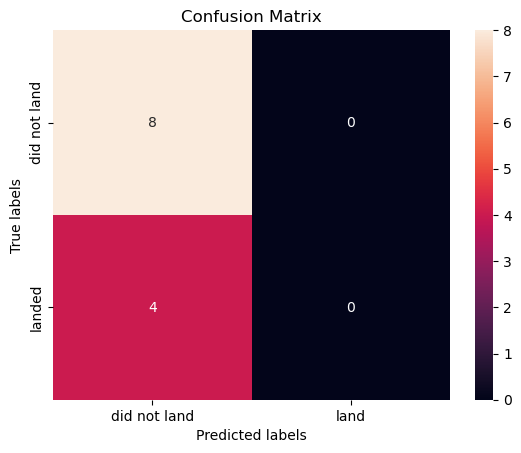

In [219]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [220]:
svm = SVC()

# Define the parameters dictionary for the grid search
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# Create a GridSearchCV object with cv = 10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the object to the training data
svm_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

Tuned hyperparameters (best parameters):  {'C': np.float64(31.622776601683793), 'gamma': np.float64(0.03162277660168379), 'kernel': 'rbf'}
Accuracy: 0.595


In [221]:
accuracy = svm_cv.score(X_test, Y_test)

# Print the result
print("Accuracy on the test data:", accuracy)

Accuracy on the test data: 0.75


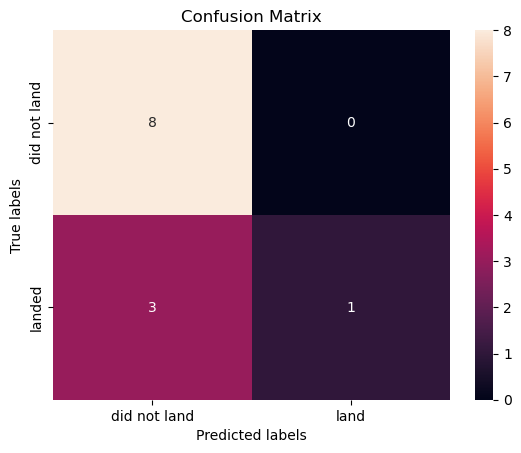

In [222]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [223]:
# Create a decision tree classifier object
tree = DecisionTreeClassifier()

# Define the parameters dictionary for the grid search
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Create a GridSearchCV object with cv = 10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the object to the training data
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

Tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.7


C:\Users\Madhav\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Madhav\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Madhav\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Madhav\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_p

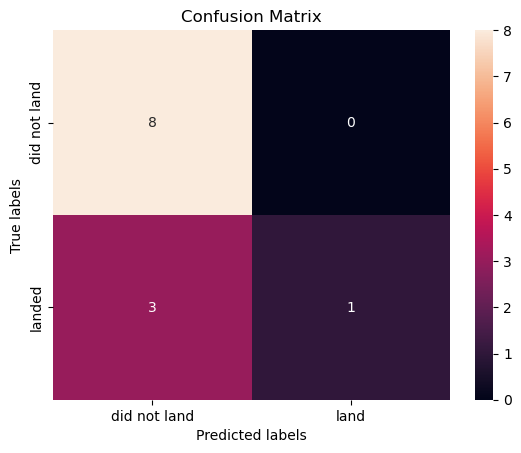

In [224]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [225]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create a K-Nearest Neighbors classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object with cv = 10
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the object to the training data
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

C:\Users\Madhav\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Madhav\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Madhav\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Madhav\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^

Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Accuracy: 0.67


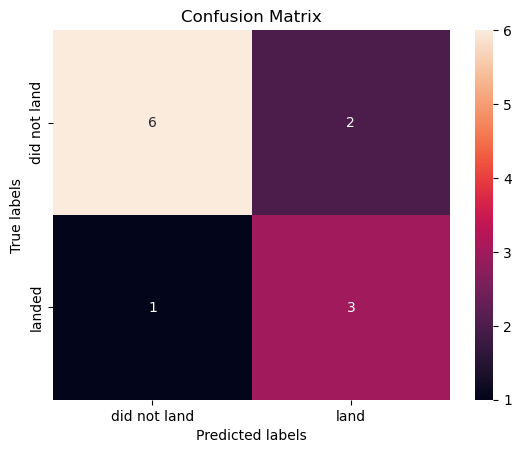

In [226]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)